### Homework 5

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
import pickle as pkl
plt.rcParams["figure.figsize"] = (10,6)

### Problem 1

<ipython-input-5-9e29671fcf13>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(datacenters,signalcenters,Psd.T)


Text(0.5, 0, 'Observed data, $P(d|s)$')

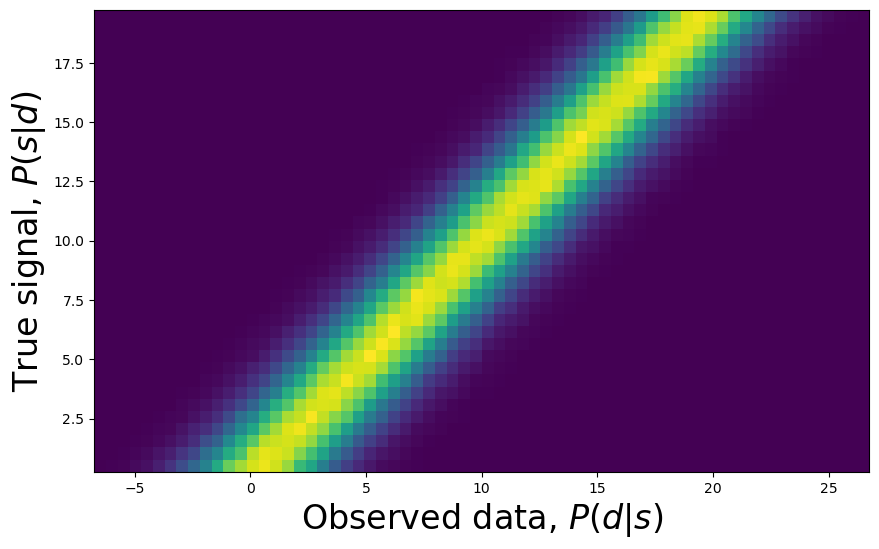

In [5]:
x = np.linspace(-20,20,40)
bkgd = stats.norm.rvs(loc=0,scale=2, size = 1000000)
signal = stats.uniform.rvs(loc=0,scale=20, size = 1000000)
data = bkgd + signal

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

### 1B:

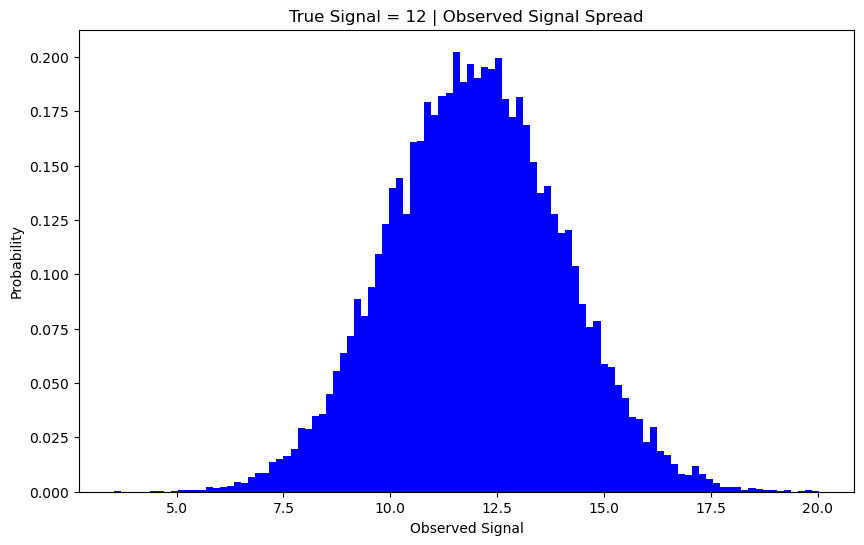

In [13]:
table = pd.DataFrame(columns = ['Background', 'Signal', 'Data'])
table['Data'] = data
table['Signal'] = signal
table['Background'] = bkgd

inject_12 = table.query(f'11.8 < Signal < 12.2')
plt.hist(inject_12['Data'], bins = 100, density = True, color = 'blue')
plt.xlabel('Observed Signal')
plt.ylabel('Probability')
plt.title('True Signal = 12 | Observed Signal Spread')
plt.show()

I chose a true injected signal equal to 12. Above is the plot of the observed signal spread (12 +/- 0.2) recorded after injection.
The y-axis represents the probability that, assuming the signal behind the data is 12, we get an x-value between the start and end of a step if we select a value randomly from our data. This plot is like a "slice" of the original 2D histogram that was plotted at the beginning of Problem 1, at the line where the y-axis, P(s|d), is equal to 12.

### 1C:

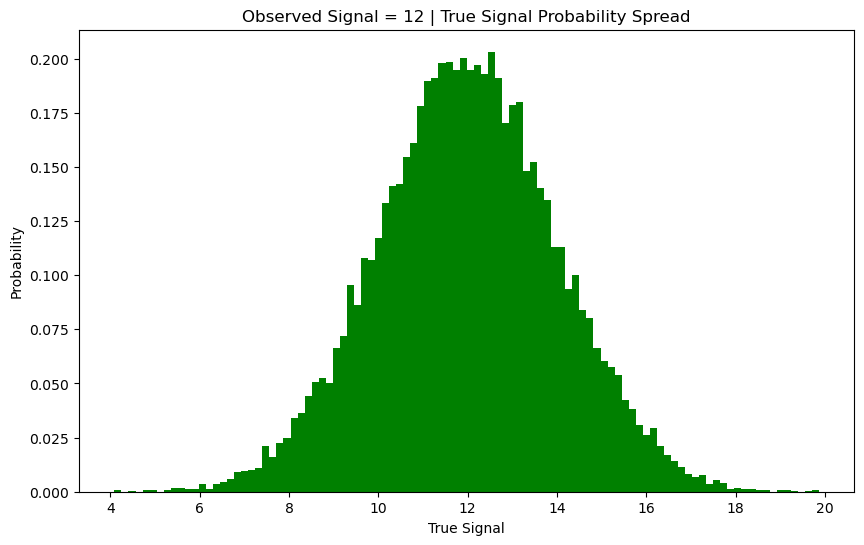

In [18]:
observed_12 = table.query(f'11.8 < Data < 12.2')
plt.hist(observed_12['Signal'], bins = 100, density = True, color = 'green')
plt.xlabel('True Signal')
plt.ylabel('Probability')
plt.title('Observed Signal = 12 | True Signal Probability Spread')
plt.show()

The plot above shows the probability of the true signal value, given an observed value of 12. This plot is like a "slice" of the original 2D histogram, except it is a vertical line where the x-value, P(d|s), is equal to 12.

### Problem 2

To repeat the previous problem with a background with a non-zero mean, I chose a Gaussian background centered at 4, while keeping the same value for sigma = 2 and interval 0 - 20. 

<ipython-input-20-1f51540ecca9>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(datacenters,signalcenters,Psd.T)


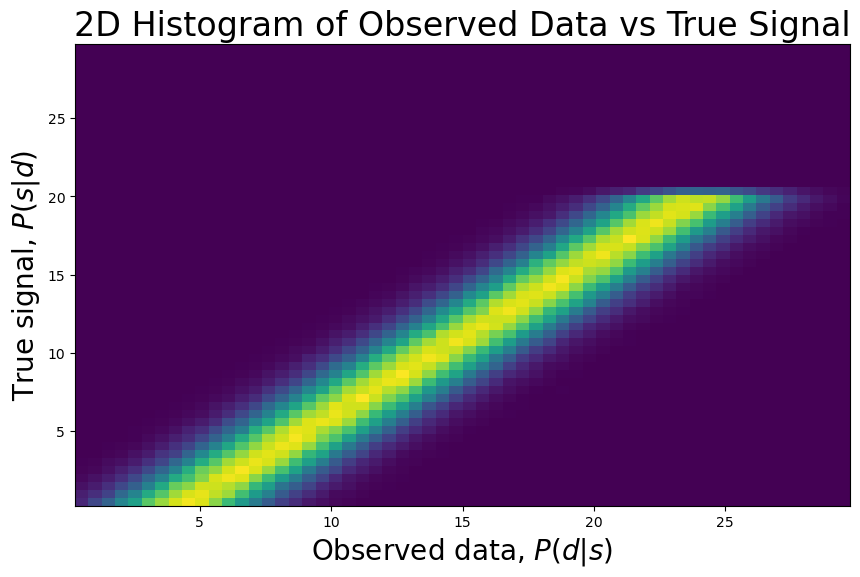

Sigma = 2
Centered at 4


In [20]:
x = np.linspace(-20,20,40)
bkgd = stats.norm.rvs(loc=4,scale=2, size = 1000000)
signal = stats.uniform.rvs(loc=0,scale=20, size = 1000000)
data = bkgd + signal
signaledges = np.linspace(0,30,60)
dataedges = np.linspace(0,30,60)
Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)
datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.title("2D Histogram of Observed Data vs True Signal", fontsize = 24)
plt.ylabel('True signal, $P(s|d)$', fontsize = 20)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 20)
plt.show()

print("Sigma = 2")
print("Centered at 4")

### 2B:

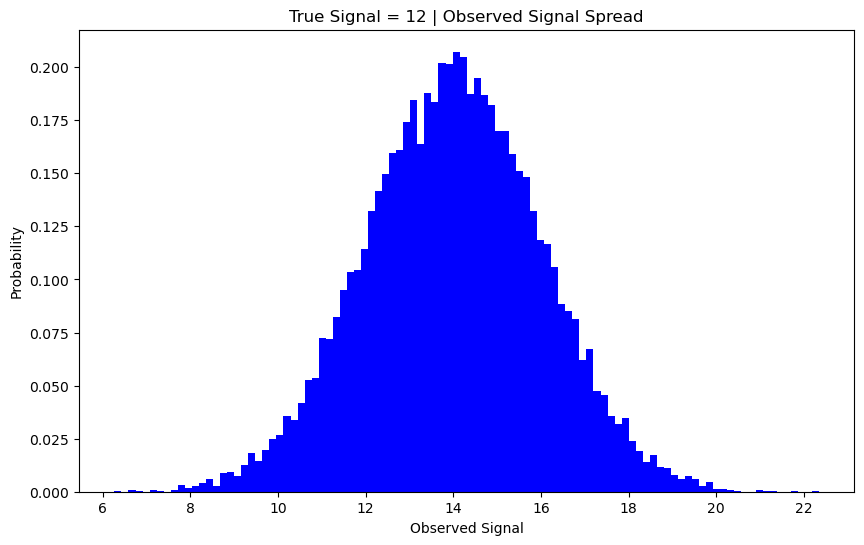

In [21]:
table = pd.DataFrame(columns = ['Background', 'Signal', 'Data'])
table['Data'] = data
table['Signal'] = signal
table['Background'] = bkgd

inject_12 = table.query(f'11.8 < Signal < 12.2')
plt.hist(injected14['Data'], bins = 100, density = True, color = 'blue')
plt.xlabel('Observed Signal')
plt.ylabel('Probability')
plt.title('True Signal = 12 | Observed Signal Spread')
plt.show()

The above plot shows the spread of possible observed signals (x-axis) and their corresponding probabilities (y-axis) given an injected signal equal to 12.

### 2C:

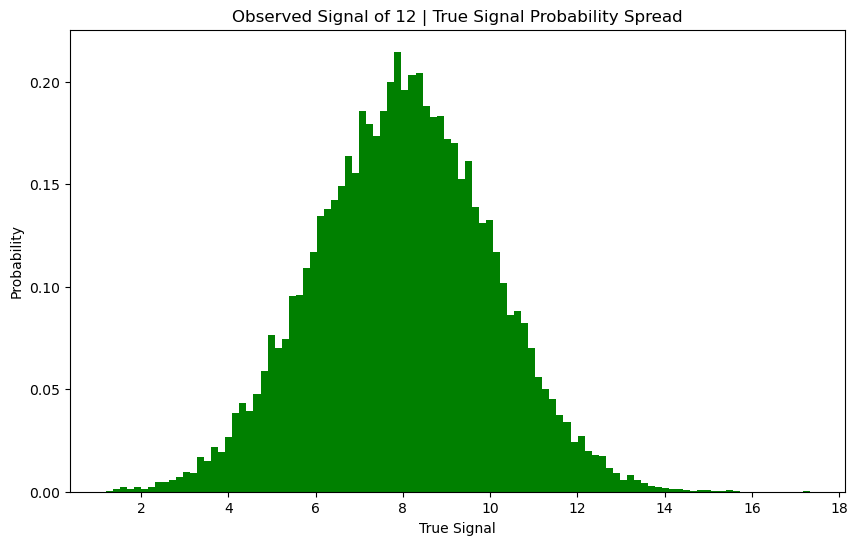

In [23]:
observed_12 = table.query(f'11.8 < Data < 12.2')
plt.hist(observed_12['Signal'], bins =100, density = True, color = 'green')
plt.xlabel('True Signal')
plt.ylabel('Probability')
plt.title('Observed Signal of 12 | True Signal Probability Spread')
plt.show()

The plot above shows the spread of possible true signal values (x-axis) corresponding to their respective probability (y-axis), given an observed signal equal to 12.

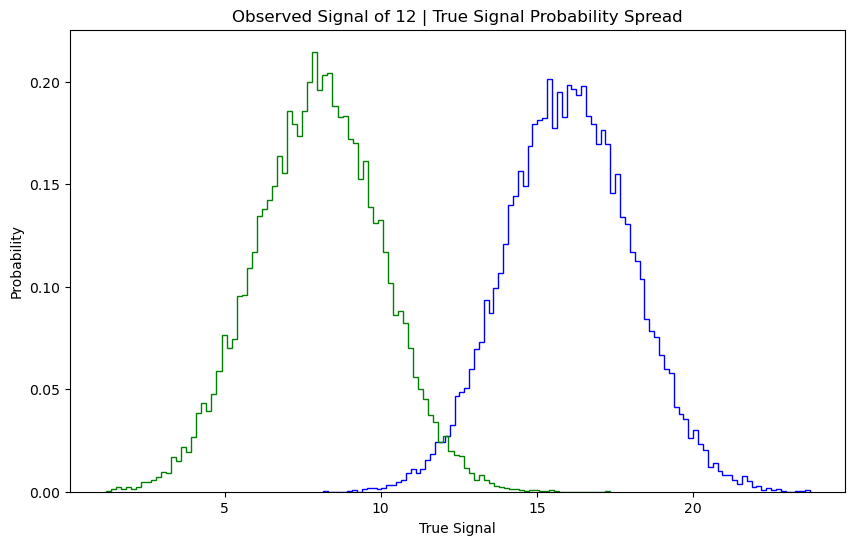

In [25]:
plt.hist(inject_12['Data'], bins = 100, density = True, histtype = 'step', color = 'blue')
plt.hist(observed_12['Signal'], bins = 100, density = True, histtype = 'step', color = 'green')
plt.xlabel('True Signal')
plt.ylabel('Probability')
plt.title('Observed Signal of 12 | True Signal Probability Spread')
plt.show()

The two graphs above are not centered around the same point because the background distribution has a non-zero mean. When there is an injection signal equal to 12, both graphs are offset, but in opposite directions, by a magnitude equal to the mean of the background (in this case 4). 